# Poisson Equation in 2D - Sinusoid Source

In [1]:
import jax
import anon
import anabel
import anabel.backend as anp
from interpolate import lagrange_t6
from poisson import poisson2 as poisson
jax.config.update("jax_enable_x64", True)

In [2]:
PI = anp.pi
u = lambda x: anp.cos(PI/2*anp.linalg.norm(x))
f = lambda x: (anp.cos(PI*anp.linalg.norm(x)/2)+anp.sinc(anp.linalg.norm(x)/2))*0.25*PI**2

Model built with 12602 free dofs and 13004 elements
	m: 5, g: 8
	loaded quadrature
source vector assembled
	State determination complete
	Matrix assembly complete
stiffness matrix assembled
	execution complete


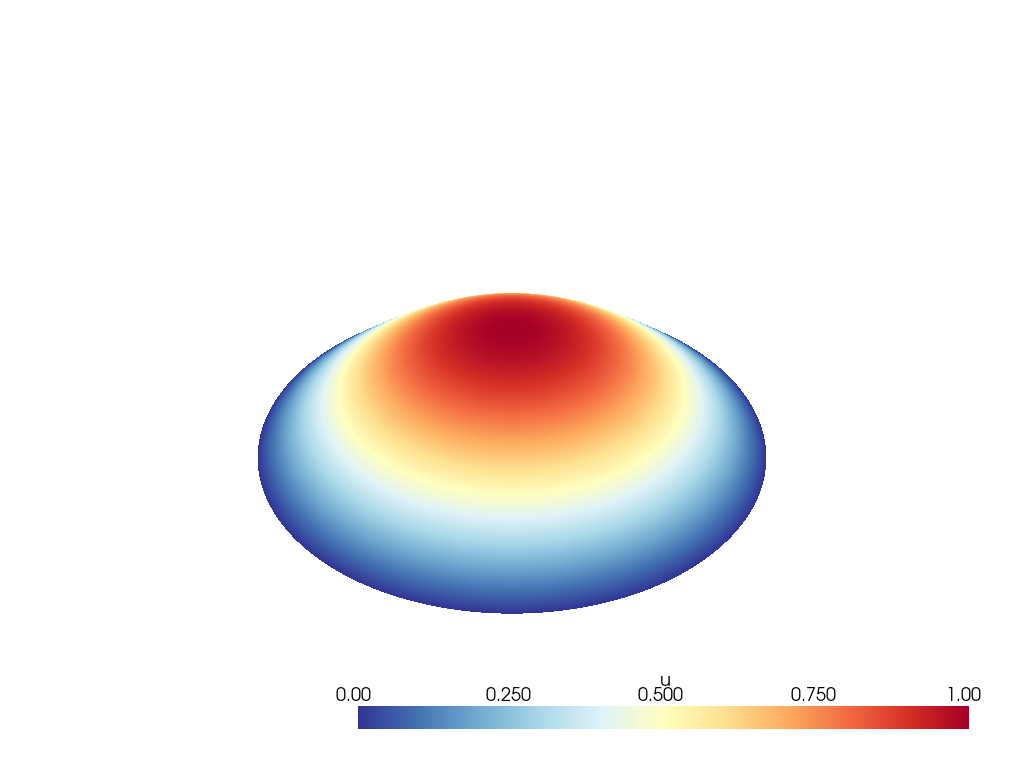

	m: 5, g: 13
	loaded quadrature
source vector assembled
	State determination complete
	Matrix assembly complete
stiffness matrix assembled
	execution complete


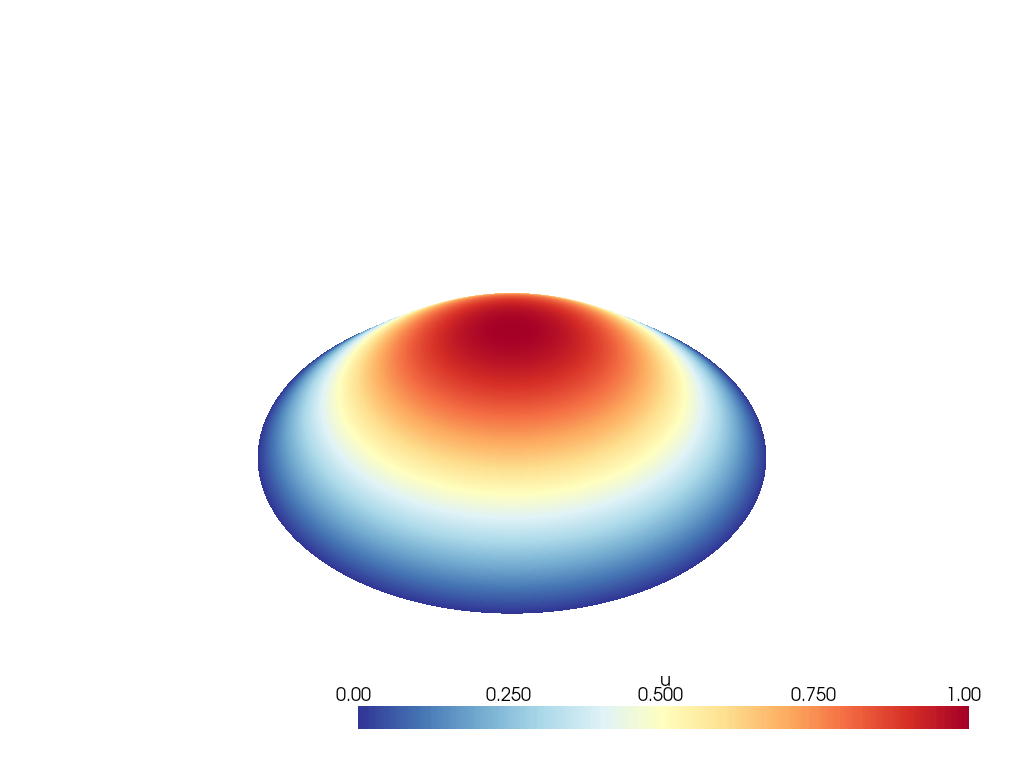

	m: 5, g: 19
	loaded quadrature
source vector assembled
	State determination complete
	Matrix assembly complete
stiffness matrix assembled
	execution complete


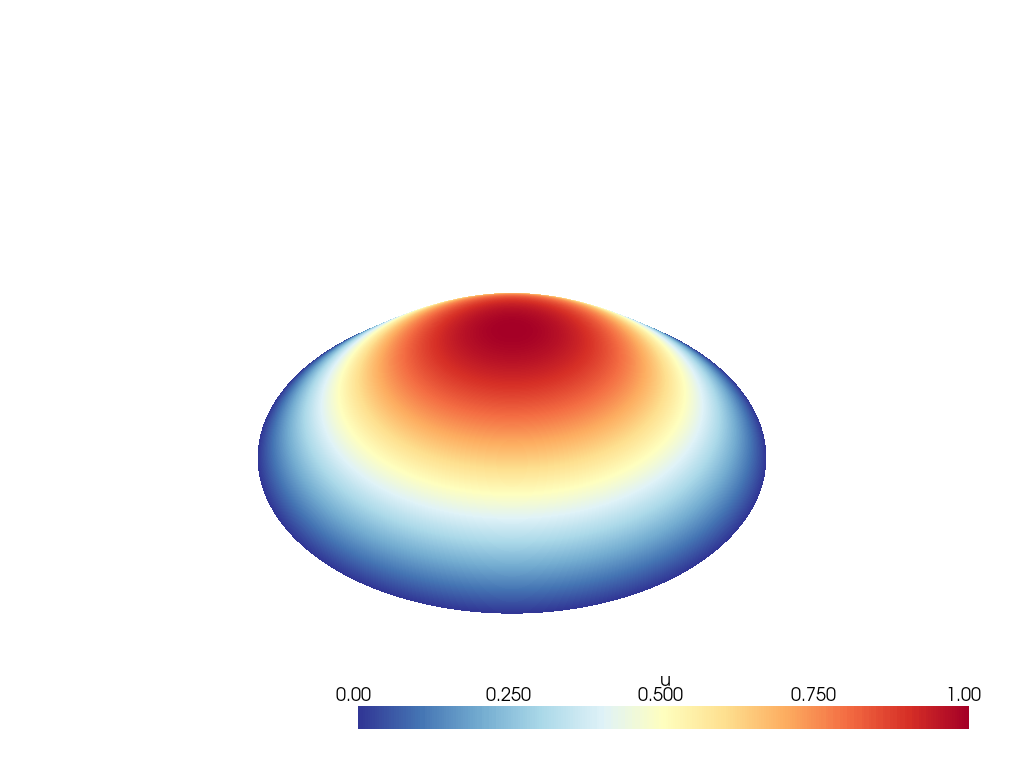

In [4]:
for m in [5]:#4,5]:
    from jax.interpreters import xla
    xla._xla_callable.cache_clear()

    model =  anabel.MeshGroup.read(f"../dat/circle_iso/mesh{m}", "m228", cell="triangle6")
#     xi = model.param("xi")
    elem = poisson(*[lagrange_t6()]*3, f=f)

    U = model.compose(elem=elem, solver="sparse", verbose=True)
    print(f"Model built with {model.nf} free dofs and {model.ne} elements")
    for g in [8,13,19]:
        print(f"\tm: {m}, g: {g}")
        quad = anon.quad.simplex.Simplex.load(f"../dat/quadrature/gauss{g:02}.m")
        print("\tloaded quadrature")
        U_h = U(quad.points, 2.0*quad.weights)
        print("\texecution complete")
        anp.savez(f"../out/mesh{m}-gauss{g:02}-b.npz",U_h)
        model.plot(U_h,render_points_as_spheres=True, savefig=f"../img/mesh{m}-gauss{g:02}-b.png")